In [1]:
import pandas as p d
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("https://s3.amazonaws.com/thinkific/file_uploads/287654/attachments/2a8/1b8/ec9/creditcard.csv")

In [3]:
df.head()

,Cust ID,Gender,Age,Monthly Income in 1000s,CreditScore (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
df.describe()

,Cust ID,Age,Monthly Income in 1000s,CreditScore (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Cust ID                  200 non-null    int64 
 1   Gender                   200 non-null    object
 2   Age                      200 non-null    int64 
 3   Monthly Income in 1000s  200 non-null    int64 
 4   CreditScore (1-100)      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [6]:
X = df.iloc[:,[3,4]].values
#we dont have a Y variable as we have no target variable

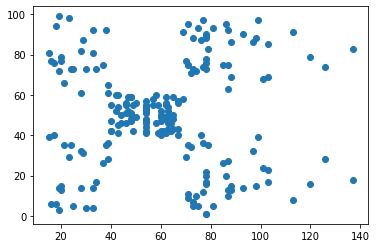

In [7]:
#Cplt.scatter(X[:,0],X[:,1])

### CREATING DENDROGRAM

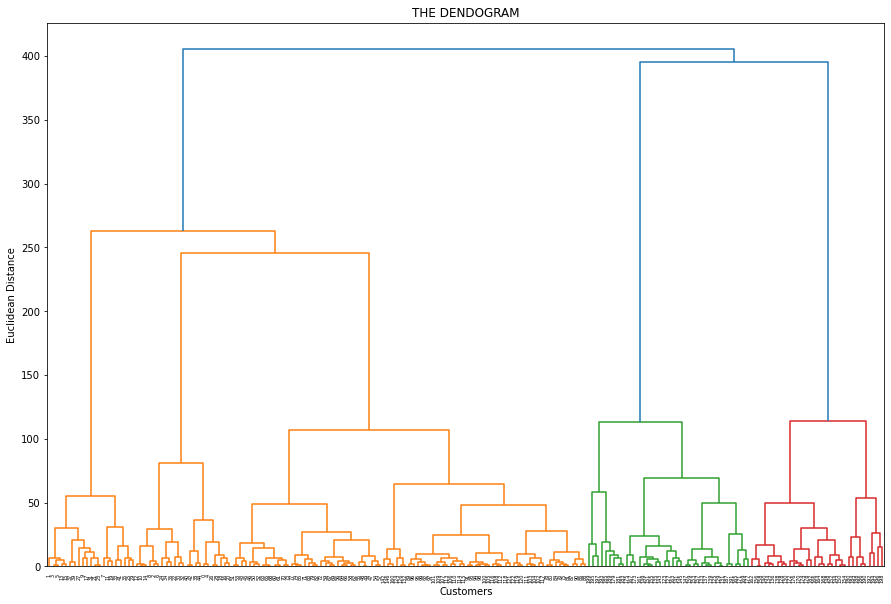

In [10]:
#Finding the optimal Clusters using the DENDROGRAMS
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(15,10))
dendogram = sch.dendrogram(sch.linkage(X,method='ward'))
plt.title("THE DENDOGRAM")
plt.xlabel("Customers")
plt.ylabel("Euclidean Distance")
plt.show()

From the above Dendrogram, we can see that there can be 5 optimal clusters for this case study of credit card by drawing horizontal lines method.

In [11]:
#Fitting the model

from sklearn.cluster import AgglomerativeClustering
hCluster = AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
y_clustering = hCluster.fit_predict(X)

In [12]:
y_clustering

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int64)

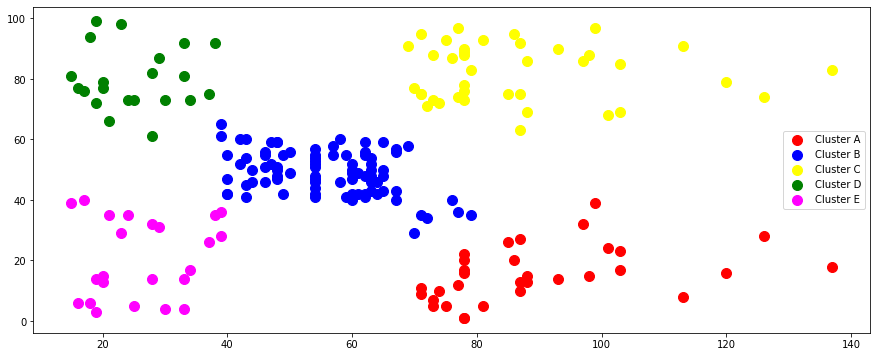

In [13]:
#Visualizing results

plt.figure(figsize=(15,6))
plt.scatter(X[y_clustering==0,0],X[y_clustering==0,1],s=100,c='red',label='Cluster A')
plt.scatter(X[y_clustering==1,0],X[y_clustering==1,1],s=100,c='blue',label='Cluster B')
plt.scatter(X[y_clustering==2,0],X[y_clustering==2,1],s=100,c='yellow',label='Cluster C')
plt.scatter(X[y_clustering==3,0],X[y_clustering==3,1],s=100,c='green',label='Cluster D')
plt.scatter(X[y_clustering==4,0],X[y_clustering==4,1],s=100,c='magenta',label='Cluster E')

plt.legend()